# моделирование боевых действий

In [1]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.integrate import solve_ivp

In [2]:
%matplotlib notebook
style = {'description_width': 'initial'}

## $ \frac{d N_1}{d t} = -\alpha_1(t) N_1 - \beta_2(t)  N_2 + \gamma_1(t)$

## $ \frac{d N_2}{d t} = -\alpha_2(t) N_2 - \beta_1(t) N_1 + \gamma_2(t)$

## $ \alpha_1, \alpha_2 $ - потери не связанные с боевыми действиями

## $\beta_1, \beta_2 $ - потери в боевых действиях

## $\gamma_1, \gamma_2$ - скорость получения подкрепления

## простейшая модель случай регулярных армий

<IPython.core.display.Javascript object>


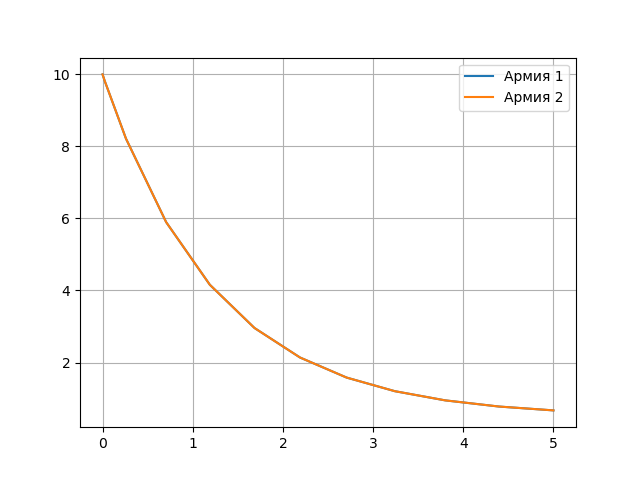

<IPython.core.display.Javascript object>


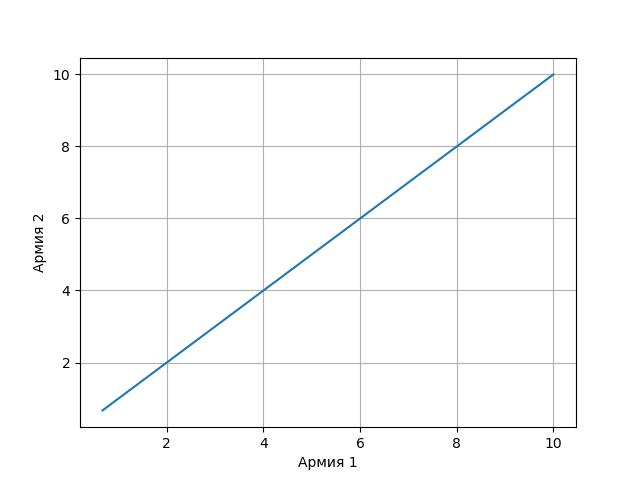

interactive(children=(FloatSlider(value=0.4, description='a_1', max=1.0), FloatSlider(value=0.4, description='…

In [17]:
def regular_war_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([-a_1*y[0] - b_2*y[1] + g_1, -a_2*y[1] - b_1*y[0] + g_2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Армия 1', 'Армия 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def regular_war_plotter(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Армия 1')
    plt.ylabel('Армия 2')

    solve = solve_ivp(lambda t, y: regular_war_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Армия 1', 'Армия 2'))
    
interact(regular_war_plotter,
    a_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    a_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    b_1=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.4),
    b_2=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.4),
    g_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    g_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=5),
    start_value_N=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style),
    start_value_M=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style)
);

<IPython.core.display.Javascript object>


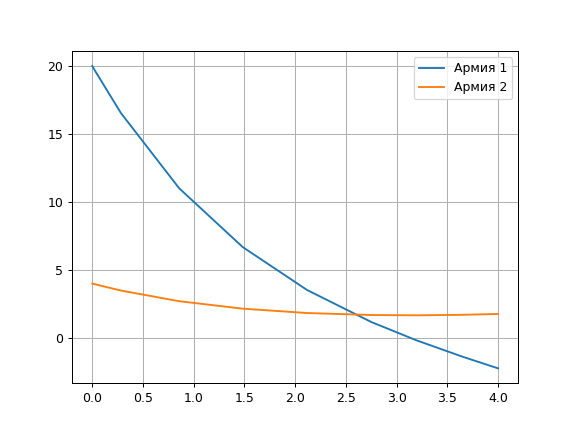

<IPython.core.display.Javascript object>


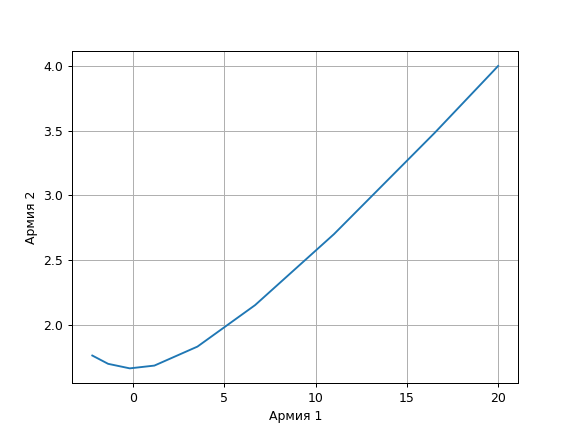

interactive(children=(FloatSlider(value=0.4, description='a_1', max=1.0), FloatSlider(value=0.4, description='…

In [20]:
def partizan_war_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([-a_1*y[0] - b_2*y[1] + g_1, -a_2*y[1] - b_1*y[0]*y[1] + g_2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Армия 1', 'Армия 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def partizan_war_plotter(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Армия 1')
    plt.ylabel('Армия 2')

    solve = solve_ivp(lambda t, y: regular_war_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Армия 1', 'Армия 2'))
interact(partizan_war_plotter,
    a_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    a_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    b_1=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.4),
    b_2=widgets.FloatSlider(min=0, max=5, step=0.1, value=0.4),
    g_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    g_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=5),
    start_value_N=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style),
    start_value_M=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style)
);

## сложнение модели

<IPython.core.display.Javascript object>


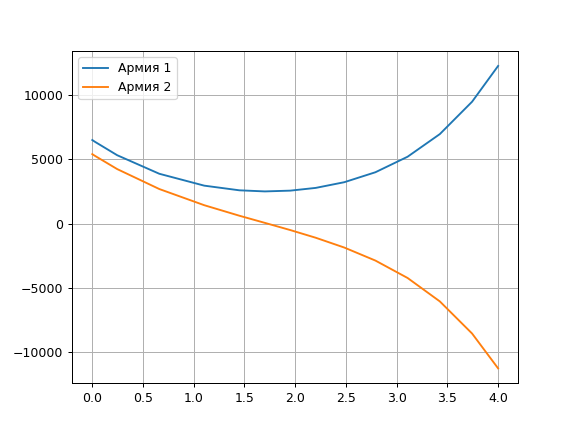

<IPython.core.display.Javascript object>


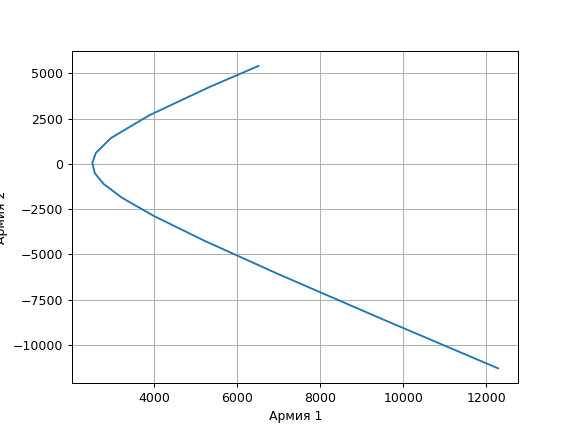

interactive(children=(Dropdown(description='a_1', options=(<function fa_1 at 0x000001D44D8297B8>, <function fa…

In [34]:
def regular_war_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([-a_1(t)*y[0] - b_2(t)*y[1] + g_1, -a_2(t)*y[1] - b_1(t)*y[0] + g_2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Армия 1', 'Армия 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def regular_war_plotter1(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Армия 1')
    plt.ylabel('Армия 2')

    solve = solve_ivp(lambda t, y: regular_war_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Армия 1', 'Армия 2'))
    

    
def fa_1(t):
    return 1 + 1/(1+t**0.5)

def fa_2(t): 
    return 1 + 1/(1+t**0.7)

def fa_3(t):
    return 0*t

def fb_1(t):
    return 0.8 + (-t**2+50*t)/1000

def fb_2(t): 
    return 1 + (-t**2+30*t)/1000

def fb_3(t):
    return 0*t

def q(t):
    return 1 + 0*t

interact(regular_war_plotter1,
    a_1=[fa_1, fa_2, fa_3],
    a_2=[fa_1, fa_2, fa_3],
    b_1=[fb_1, fb_2, fb_3],
    b_2=[fb_1, fb_2, fb_3],
    g_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    g_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=5),
    start_value_N=widgets.IntSlider(min=10, max=20000, step=100, value=1000,style = style),
    start_value_M=widgets.IntSlider(min=10, max=20000, step=100, value=1000,style = style)
);

<IPython.core.display.Javascript object>


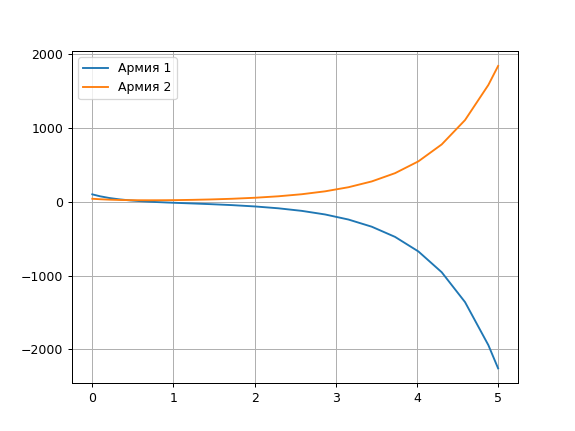

<IPython.core.display.Javascript object>


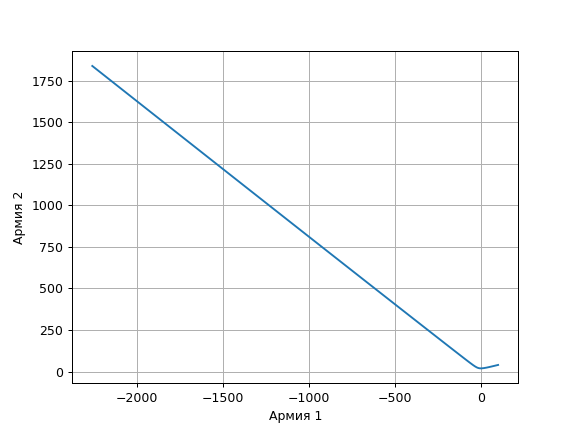

interactive(children=(Dropdown(description='a_1', options=(<function fa_1 at 0x000001D44D87B2F0>, <function fa…

In [40]:
def partizan_war_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([-a_1(t)*y[0] - b_2(t)*y[1] + g_1, -a_2(t)*y[1] - b_1(t)*y[0]*y[1] + g_2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Армия 1', 'Армия 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def partizan_war_plotter1(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Армия 1')
    plt.ylabel('Армия 2')

    solve = solve_ivp(lambda t, y: regular_war_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Армия 1', 'Армия 2'))
    

    
def fa_1(t):
    return 1 + 1/(1+t**0.5)

def fa_2(t): 
    return 1 + 1/(1+t**0.9)

def fa_3(t):
    return 0*t

def fb_1(t):
    return 0.8 + (-t**2+50*t)/1000

def fb_2(t): 
    return 3

def fb_3(t):
    return 0*t

def q(t):
    return 1 + 0*t

interact(partizan_war_plotter1,
    a_1=[fa_1, fa_2, fa_3],
    a_2=[fa_1, fa_2, fa_3],
    b_1=[fb_1, fb_2, fb_3],
    b_2=[fb_1, fb_2, fb_3],
    g_1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    g_2=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=5),
    start_value_N=widgets.IntSlider(min=10, max=200, step=10, value=10,style = style),
    start_value_M=widgets.IntSlider(min=10, max=200, step=10, value=10,style = style)
);